In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,Activation
import datetime

In [39]:
data = pd.read_csv('dataset/TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-02,43.917999,43.981998,43.422001,43.792000,43.792000,10164000
1,2016-06-03,44.000000,44.388000,43.602001,43.798000,43.798000,11145000
2,2016-06-06,43.599998,44.180000,43.090000,44.136002,44.136002,11247500
3,2016-06-07,44.448002,46.888000,44.304001,46.467999,46.467999,31068000
4,2016-06-08,46.759998,48.169998,46.521999,47.104000,47.104000,29860000


# Comopute Mid Price

In [40]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices+low_prices)/2

# Create Windows

In [41]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [42]:
normalized_data = []

for window in result:
    normalized_window = [((float(p) / float(window[0]))-1) for p in window]
    normalized_data.append(normalized_window)
    
result = np.array(normalized_data)

In [46]:
#split train and test
row = int(round(result.shape[0]*0.9))
train = result[:row,:]
np.random.shuffle(train)

x_train = train[:,:-1]
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = train[:,-1]

x_test = result[row:,:-1]
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test = result[row:,-1]

x_train.shape, x_test.shape

((1086, 50, 1), (121, 50, 1))

# Build a Model

In [47]:
model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='rmsprop')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [48]:
model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          batch_size=10,
          epochs=20)

Epoch 1/20
109/109 [==============================] - 10s 46ms/step - loss: 0.0210 - val_loss: 0.0058
Epoch 2/20
109/109 [==============================] - 3s 29ms/step - loss: 0.0114 - val_loss: 0.0040
Epoch 3/20
109/109 [==============================] - 3s 28ms/step - loss: 0.0069 - val_loss: 0.0038
Epoch 4/20
109/109 [==============================] - 3s 29ms/step - loss: 0.0062 - val_loss: 0.0029
Epoch 5/20
109/109 [==============================] - 3s 25ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 6/20
109/109 [==============================] - 3s 24ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 7/20
109/109 [==============================] - 3s 27ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 8/20
109/109 [==============================] - 3s 26ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 9/20
109/109 [==============================] - 3s 26ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 10/20
109/109 [==============================] - 3s 27ms/step - loss: 0.0029 - val_l

# Prediction

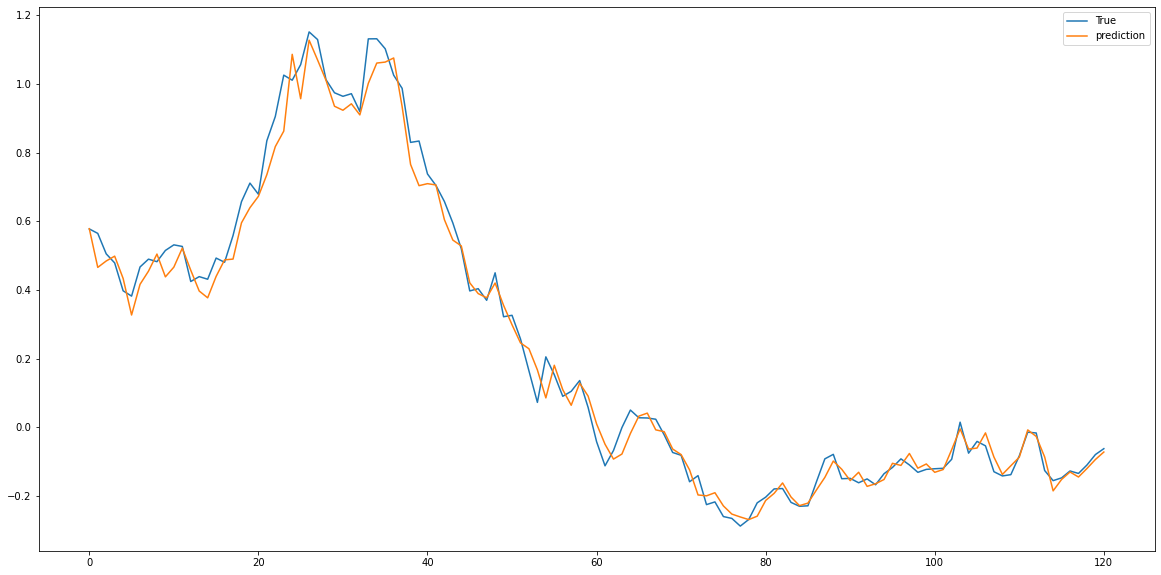

In [54]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white',figsize=(20,10))
ax=  fig.add_subplot(111)
ax.plot(y_test,label='True')
ax.plot(pred,label='prediction')
ax.legend()
plt.show()